<a href="https://colab.research.google.com/github/projectwint/practice_AI/blob/main/ImageDataGenerator_%EC%8B%A4%ED%96%89%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


출처 : https://sevillabk.github.io/image-generator/ </br>
https://velog.io/@ym980118/%EB%94%A5%EB%9F%AC%EB%8B%9D-Keras-ImageDataGenerator%EB%A5%BC-%EC%9D%B4%EC%9A%A9%ED%95%9C-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%A6%9D%EA%B0%95-Data-Augmentation

In [ ]:
import glob
img_dir = '/content/drive/MyDrive/2차_편집/물체_2_사진/pixabay' #사진을 가져올 폴더명
files = glob.glob(img_dir +'/**' + '/*.jpg', recursive=True) #폴더에 저장된 모든 jpg 파일의 리스트(하위 폴더까지 탐색)

print(len(files))

155


Case1 파일 개수: 실제 155, glob한 개수 155<br>
Case2 파일 개수: 실제 25, glob한 개수 25<br>
Case3 파일 개수: 실제 74, glob한 개수 74<br>
Case5 파일 개수: 실제 125, glob된 개수 125<br>
Case6 파일 개수: 실제 56, glob된 개수 56<br>
Case7 파일 개수: 실제 163, glob한 개수 163

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import glob
import numpy as np

np.random.seed(5) # 랜덤시드 고정시키기

img_dir = '/content/drive/MyDrive/2차_편집/물체_1_사진/pixabay_temp' #사진을 가져올 폴더명
files = glob.glob(img_dir +'/**' + '/*.jpg', recursive=True) #폴더에 저장된 모든 jpg 파일의 리스트(하위 폴더까지 탐색)

#좌우반전, -15 ~ +15 사이 임의 각도로 회전, 밝기 조정, 확대
data_generator = ImageDataGenerator(horizontal_flip = True,
                                    rotation_range=15.0,
                                    brightness_range=(0.1, 0.9),
                                    zoom_range=[0.5, 0.9])

for i, f in enumerate(files):
    image = load_img(f)

    x = img_to_array(image)
    x = x.reshape((1,) + x.shape)

    i = 0
    for batch in data_generator.flow(x, batch_size = 1, save_to_dir = '/content/drive/MyDrive/water/temp2',
                                     save_prefix = 'water_pixa', save_format='jpg'):
        i += 1
        if i >= 10: #한 사진당 10회 반복시 종료
            break

pixabay 폴더에서 원본이 155장, 따라서 1550장이 나와야하는데 1422장이 나왔다.<br>
같은 방법으로 unsplash 폴더에서 25장이라, 250장이어야하는데 246장이 나왔고, 직접 찍은 사진에서는 74장이라 740장이 나와야하는데 708장이 나왔다. 
<br>
<br>
**[ 손실률 ]**
<br>
Case1. (1550 - 1422) / 1550 * 100% = 8.26% <br>
Case2. (250 - 246) / 250 = 1.6%<br>
Case3. (740 - 708) / 740 = 4.32% <br>
Case4. (100 - 98) / 100 = 2%<br>
Case5. (1250 - 1168) / 1250 = 6.56%<br>
Case6. (560 - 543) / 560 = 3.04%<br>
Case7. (1630 - 1484) / 1630 = 8.96%<br>
<br>
또한, 맨 처음에 일괄적으로 254장을 실행시켰을 때는 1340장으로 손실률이 매우 컸다. 이때를 제외하면, 손실률과 실행시킬 때 넣는 파일의 개수는 (정확히 비례하지는 않지만) 대략적으로 비례하는 결과를 얻었다.

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

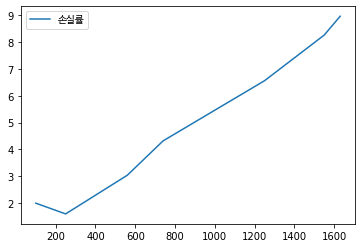

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = [1550, 250, 740, 100, 1250, 560, 1630] #기대값
y = [8.26, 1.6, 4.32, 2, 6.56, 3.04, 8.96] #기대값에 대응하는 손실률

x_sorted = np.sort(x)
x_sort_index = np.argsort(x)
y_sorted_by_x = [y[i] for i in x_sort_index] #x를 정렬한 인덱스를 기준으로 정렬

fig, ax = plt.subplots()
ax.plot(x_sorted, y_sorted_by_x)

plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False
label = ['손실률']
plt.legend(label)

plt.show()

원인을 찾아본 결과 파일명이 랜덤으로 생성되면서 데이터의 수가 늘어날수록 파일명이 중복될 확률이 높아져 손실률이 높아지는 문제가 발생했다는 것을 알게 되었다. 따라서 파일명의 접두사에 flag라는 변수를 추가하여 파일명의 중복 가능성을 0에 가깝게 낮추는 방식으로 수정하였다.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import glob
import numpy as np

img_dir = '/content/drive/MyDrive/2차_편집/물체_2_사진' #사진을 가져올 폴더명
save_to_dir = '/content/drive/MyDrive/ground' #증가된 사진을 저장할 폴더명
files = glob.glob(img_dir +'/**' + '/*.jpg', recursive=True) #폴더에 저장된 모든 jpg 파일의 리스트(하위 폴더까지 탐색)

#좌우반전, -15 ~ +15 사이 임의 각도로 회전, 밝기 조정, 확대
data_generator = ImageDataGenerator(horizontal_flip = True,
                                    rotation_range=15.0,
                                    brightness_range=(0.1, 0.9),
                                    zoom_range=[0.5, 0.9])

flag = 0 #파일명에 매길 숫자 변수(파일명 중복으로 인한 손실 방지)
for i, f in enumerate(files):
    image = load_img(f)

    x = img_to_array(image)
    x = x.reshape((1,) + x.shape)

    i = 0
    flag += 1
    for batch in data_generator.flow(x, batch_size = 1, save_to_dir = save_to_dir,
                                     save_prefix = 'ground_' + str(flag), save_format='jpg'):
        i += 1
        if i >= 10: #한 사진당 10회 반복시 종료
            break

augmented_files = glob.glob(save_to_dir +'/**' + '/*.jpg', recursive=True) #증가된 파일 리스트

print("기존 데이터수 :", len(files), "\n증가된 데이터수 :", len(augmented_files))